In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
clean_df = pd.read_csv('no_missing_data.csv')

In [20]:
clean_df.shape

(2927, 86)

In [21]:
clean_df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2927 non-null   object
 1   Lot Shape       2927 non-null   object
 2   Land Contour    2927 non-null   object
 3   Utilities       2927 non-null   object
 4   Lot Config      2927 non-null   object
 5   Land Slope      2927 non-null   object
 6   Neighborhood    2927 non-null   object
 7   Condition 1     2927 non-null   object
 8   Condition 2     2927 non-null   object
 9   Bldg Type       2927 non-null   object
 10  House Style     2927 non-null   object
 11  Roof Style      2927 non-null   object
 12  Roof Matl       2927 non-null   object
 13  Exterior 1st    2927 non-null   object
 14  Exterior 2nd    2927 non-null   object
 15  Exter Qual      2927 non-null   object
 16  Exter Cond      2927 non-null   object
 17  Foundation      2927 non-null   object
 18  Heating 

We will go trough all the remaning cathegorical features and based on our analysis we wil either normalise, one hot encode or remove the feature.

In [22]:
clean_df['MS Zoning'].value_counts()

MS Zoning
RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

In [23]:
#get the average price for each category in 'MS Zoning'
clean_df.groupby('MS Zoning')['SalePrice'].mean().sort_values(ascending=False)

MS Zoning
FV         218986.949640
RL         191302.062115
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

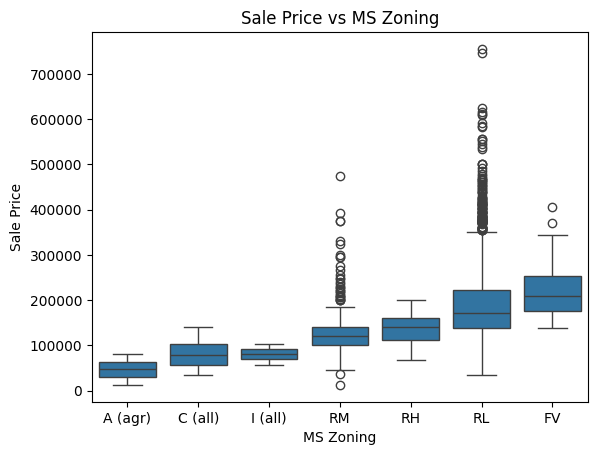

In [24]:
order = ['A (agr)', 'C (all)', 'I (all)', 'RM', 'RH', 'RL', 'FV']
sns.boxplot(x='MS Zoning', y='SalePrice', data=clean_df, order=order)
plt.xlabel('MS Zoning')
plt.ylabel('Sale Price')
plt.title('Sale Price vs MS Zoning')
plt.show()

In [25]:
df_copy = clean_df.copy(deep=True)

In [28]:
df_copy.shape

(2927, 86)

In [35]:
ms_zoning_map = {
    'A (agr)': 0,
    'C (all)': 1,
    'I (all)': 2,
    'RH': 3,
    'FV': 4,
    'RM': 5,
}
df_copy['MSZoning_encoded'] = df_copy['MS Zoning'].map(ms_zoning_map)
print(df_copy['MSZoning_encoded'].value_counts())
df_copy = df_copy.drop(['MS Zoning'], axis=1)

MSZoning_encoded
5.0    462
4.0    139
3.0     27
1.0     25
2.0      2
0.0      2
Name: count, dtype: int64


In [37]:
print(df_copy['Lot Shape'].value_counts())
print(df_copy.groupby('Lot Shape')['SalePrice'].mean().sort_values(ascending=False))

Lot Shape
Reg    1858
IR1     977
IR2      76
IR3      16
Name: count, dtype: int64
Lot Shape
IR2    229588.355263
IR3    221922.812500
IR1    210895.359263
Reg    162624.897740
Name: SalePrice, dtype: float64


By the analysis the smallest price mean is for the regular plot shapes, while the other 3 have realtive similar means, so we will drop this feature and replace it with a Has_Iregular_Lot_Shape.

In [38]:
df_copy['Has_Iregular_Lot_Shape'] = (df_copy['Lot Shape'] != 'Reg').astype(int)

print(df_copy['Has_Iregular_Lot_Shape'].value_counts())

Has_Iregular_Lot_Shape
0    1858
1    1069
Name: count, dtype: int64


In [39]:
df_copy.drop('Lot Shape', axis=1, inplace=True)


In [41]:
print(df_copy['Land Contour'].value_counts())
print(df_copy.groupby('Land Contour')['SalePrice'].mean().sort_values(ascending=False))

Land Contour
Lvl    2632
HLS     119
Bnk     116
Low      60
Name: count, dtype: int64
Land Contour
HLS    253812.126050
Low    194882.733333
Lvl    178781.254559
Bnk    144417.560345
Name: SalePrice, dtype: float64


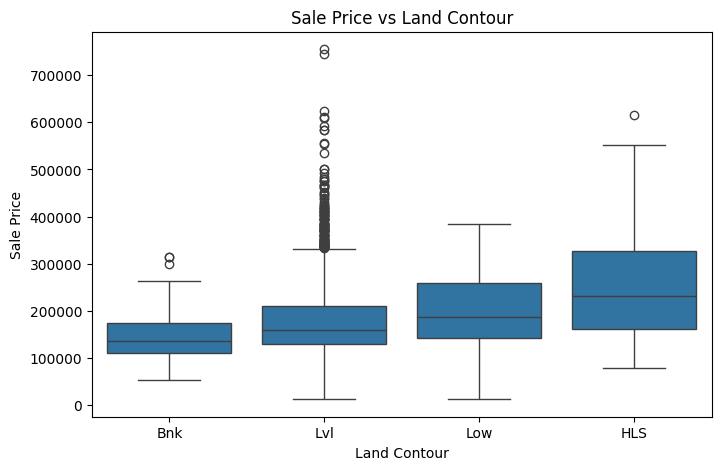

In [42]:
order = ['Bnk', 'Lvl', 'Low', 'HLS']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Land Contour', y='SalePrice', data=clean_df, order=order)

plt.xlabel('Land Contour')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Land Contour')
plt.show()

Land Contour	Mean SalePrice	Interpretation
Bnk	            144 k	        Poor (banked lot — lower elevation, less desirable)
Lvl	            179 k	        Average (level lot)
Low	            195 k	        Slightly better
HLS	            254 k	        Highest (hillside lot — often more premium view)

In [43]:
land_contour_mapping = {
    'Bnk': 1,
    'Lvl': 2,
    'Low': 3,
    'HLS': 4
}

df_copy['Land_Contour'] = df_copy['Land Contour'].map(land_contour_mapping)

df_copy.drop('Land Contour', axis=1, inplace=True)

print(df_copy['Land_Contour'].value_counts(dropna=False))

Land_Contour
2    2632
4     119
1     116
3      60
Name: count, dtype: int64


In [44]:
print(df_copy['Utilities'].value_counts())
print(df_copy.groupby('Utilities')['SalePrice'].mean().sort_values(ascending=False))

Utilities
AllPub    2924
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
Utilities
AllPub    180879.336867
NoSeWa    137500.000000
NoSewr     86312.500000
Name: SalePrice, dtype: float64


Only 3 rows have a different value to AllPub so by keeping this feature we are kepping noise in our data, so we will drop it.

In [45]:
df_copy.drop('Utilities', axis=1, inplace=True)

In [47]:
print(df_copy['Lot Config'].value_counts())
print(df_copy.groupby('Lot Config')['SalePrice'].mean().sort_values(ascending=False))

Lot Config
Inside     2137
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64
Lot Config
CulDSac    225531.872222
FR3        196635.857143
Corner     179956.937378
Inside     177395.519888
FR2        174122.894118
Name: SalePrice, dtype: float64


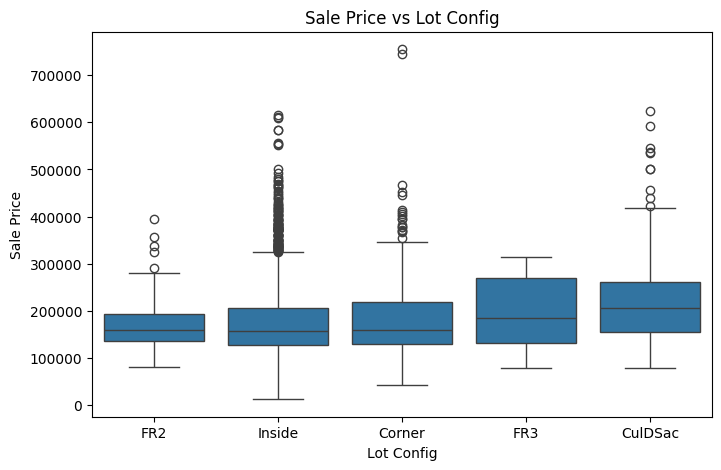

In [48]:
order = ['FR2', 'Inside', 'Corner',  'FR3', 'CulDSac']

plt.figure(figsize=(8, 5))
sns.boxplot(x='Lot Config', y='SalePrice', data=clean_df, order=order)
plt.xlabel('Lot Config')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Lot Config')
plt.show()

The Lot Config feature describes the lot’s layout relative to surrounding properties. Since it contains multiple unordered categories (Inside, Corner, CulDSac, FR2, FR3) and is strongly imbalanced—most properties are Inside—ordinal encoding would incorrectly imply a ranking between categories. To avoid introducing artificial order and bias, one-hot encoding was used instead. This approach preserves all category information without imposing hierarchy, allowing the model to learn category-specific effects directly.

In [49]:
lot_config_dummies = pd.get_dummies(df_copy['Lot Config'], prefix='LotConfig')

df_copy = pd.concat([df_copy, lot_config_dummies], axis=1)
df_copy.drop('Lot Config', axis=1, inplace=True)

In [50]:
for col in [c for c in df_copy.columns if 'LotConfig' in c]:
    print(f"\n{col} value counts:")
    print(df_copy[col].value_counts())


LotConfig_Corner value counts:
LotConfig_Corner
False    2416
True      511
Name: count, dtype: int64

LotConfig_CulDSac value counts:
LotConfig_CulDSac
False    2747
True      180
Name: count, dtype: int64

LotConfig_FR2 value counts:
LotConfig_FR2
False    2842
True       85
Name: count, dtype: int64

LotConfig_FR3 value counts:
LotConfig_FR3
False    2913
True       14
Name: count, dtype: int64

LotConfig_Inside value counts:
LotConfig_Inside
True     2137
False     790
Name: count, dtype: int64


In [51]:
print(df_copy['Land Slope'].value_counts())
print(df_copy.groupby('Land Slope')['SalePrice'].mean().sort_values(ascending=False))

Land Slope
Gtl    2786
Mod     125
Sev      16
Name: count, dtype: int64
Land Slope
Sev    207370.625000
Mod    204853.784000
Gtl    179568.073582
Name: SalePrice, dtype: float64


The Land Slope feature was one-hot encoded because its categories (Gtl, Mod, Sev) are not truly ordinal and the data is imbalanced. This avoids imposing a false numeric order and lets the model learn each slope type’s effect independently.

In [ ]:
land_slope_dummies = pd.get_dummies(df_copy['Land Slope'], prefix='LandSlope')
df_copy = pd.concat([df_copy, land_slope_dummies], axis=1)
df_copy.drop('Land Slope', axis=1, inplace=True)

In [ ]:
for col in [c for c in df_copy.columns if 'LandSlope' in c]:
    print(f"\n{col} value counts:")
    print(df_copy[col].value_counts())


land_slope_Gtl value counts:
land_slope_Gtl
True     2786
False     141
Name: count, dtype: int64

land_slope_Mod value counts:
land_slope_Mod
False    2802
True      125
Name: count, dtype: int64

land_slope_Sev value counts:
land_slope_Sev
False    2911
True       16
Name: count, dtype: int64


In [77]:
print(df_copy['Neighborhood'].value_counts())
print(df_copy.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False))

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64
Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246307.985915
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Blmngtn    196661.678571
Greens     193531.250000
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
Mitchel    162954.300885
NAmes      145097.349887
Blueste    143590.000000
NPkVill    140710.869565
Landmrk    137000.000000
Sawyer     136751.152318
SWI

In [57]:
# Building Type vs Neighborhood
pd.crosstab(clean_df['Neighborhood'], clean_df['Bldg Type'], normalize='index').round(2)


Bldg Type,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
Neighborhood,,,,,
Blmngtn,0.11,0.00,0.00,0.00,0.89
Blueste,0.00,0.00,0.00,0.50,0.50
BrDale,0.00,0.00,0.00,0.80,0.20
BrkSide,0.98,0.02,0.00,0.00,0.00
ClearCr,0.98,0.00,0.00,0.02,0.00
CollgCr,0.95,0.00,0.00,0.00,0.05
Crawfor,0.84,0.02,0.04,0.00,0.10
Edwards,0.81,0.03,0.09,0.02,0.05
Gilbert,0.99,0.01,0.00,0.00,0.00


In [58]:
# House Style vs Neighborhood
pd.crosstab(clean_df['Neighborhood'], clean_df['House Style'], normalize='index').round(2)


House Style,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
Neighborhood,,,,,,,,
Blmngtn,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
Blueste,0.00,0.00,0.30,0.00,0.00,0.70,0.00,0.00
BrDale,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
BrkSide,0.52,0.07,0.30,0.00,0.02,0.09,0.00,0.00
ClearCr,0.18,0.00,0.50,0.00,0.00,0.23,0.00,0.09
CollgCr,0.00,0.00,0.59,0.00,0.00,0.37,0.02,0.02
Crawfor,0.20,0.01,0.40,0.01,0.04,0.32,0.00,0.02
Edwards,0.22,0.00,0.52,0.00,0.01,0.12,0.07,0.06
Gilbert,0.01,0.00,0.16,0.00,0.00,0.72,0.00,0.12


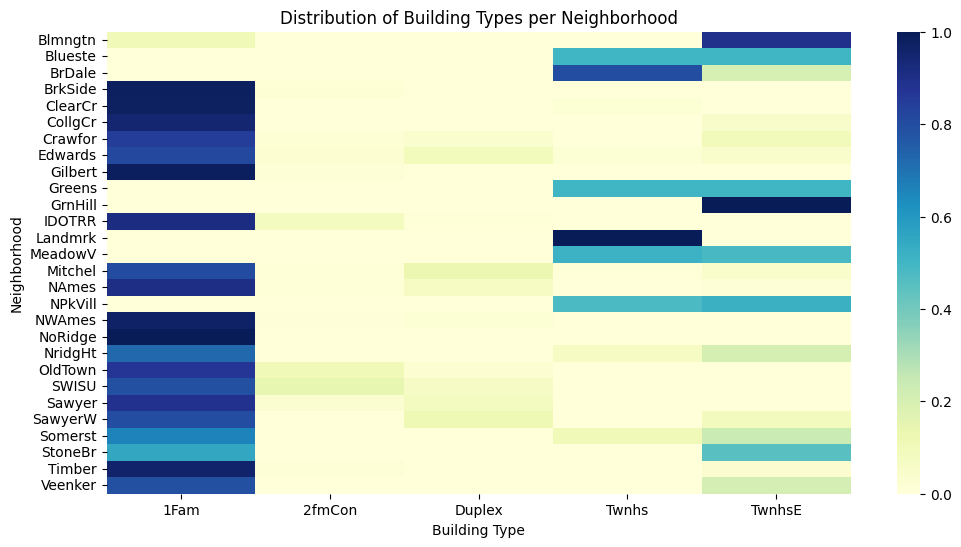

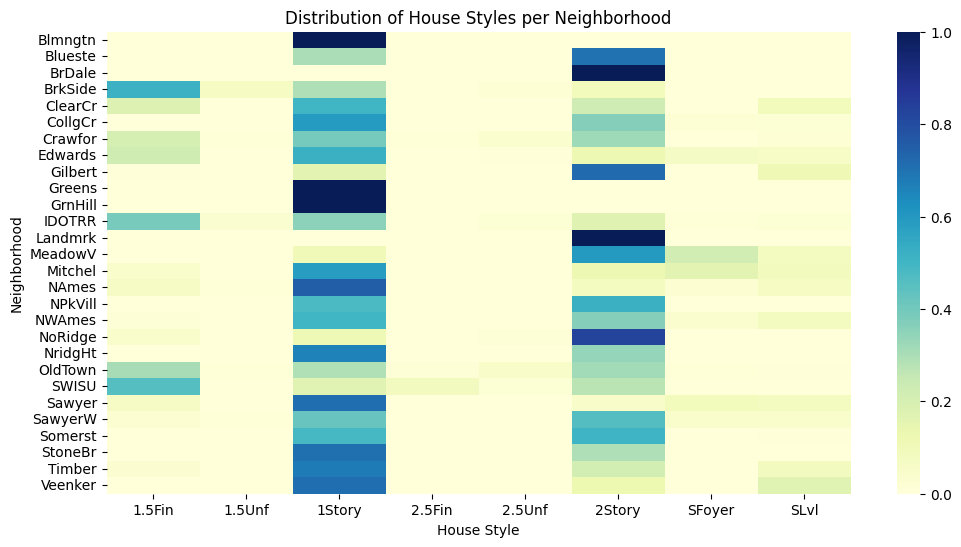

In [ ]:
bldg_heatmap = pd.crosstab(clean_df['Neighborhood'], clean_df['Bldg Type'], normalize='index')
plt.figure(figsize=(12,6))
sns.heatmap(bldg_heatmap, cmap='YlGnBu')
plt.title('Distribution of Building Types per Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Building Type')
plt.show()

style_heatmap = pd.crosstab(clean_df['Neighborhood'], clean_df['House Style'], normalize='index')
plt.figure(figsize=(12,6))
sns.heatmap(style_heatmap, cmap='YlGnBu')
plt.title('Distribution of House Styles per Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('House Style')
plt.show()

In [62]:
df_copy['Neigh_Bldg_Style'] = (
    df_copy['Neighborhood'] + '_' + 
    df_copy['Bldg Type'] + '_' + 
    df_copy['House Style']
)
combo_price = (
    df_copy.groupby('Neigh_Bldg_Style')['SalePrice']
    .mean()
    .sort_values(ascending=False)
)
combo_price


Neigh_Bldg_Style
StoneBr_1Fam_2Story      422282.923077
Edwards_1Fam_2.5Unf      415000.000000
StoneBr_1Fam_1Story      381707.400000
NridgHt_1Fam_1Story      356027.926471
NoRidge_1Fam_1.5Fin      355833.333333
                             ...      
MeadowV_Twnhs_2Story      84915.555556
IDOTRR_1Fam_1Story        83203.312500
MeadowV_TwnhsE_SFoyer     77750.000000
SawyerW_1Fam_1.5Unf       76000.000000
IDOTRR_1Fam_SFoyer        70000.000000
Name: SalePrice, Length: 192, dtype: float64

In [ ]:
price_map = df_copy.groupby('Neigh_Bldg_Style')['SalePrice'].median()
df_copy['Combo_PriceMean'] = df_copy['Neigh_Bldg_Style'].map(price_map)

df_copy[['Combo_PriceMean', 'SalePrice']].corr()


,Combo_PriceMean,SalePrice
Combo_PriceMean,1.000000,0.822309
SalePrice,0.822309,1.000000


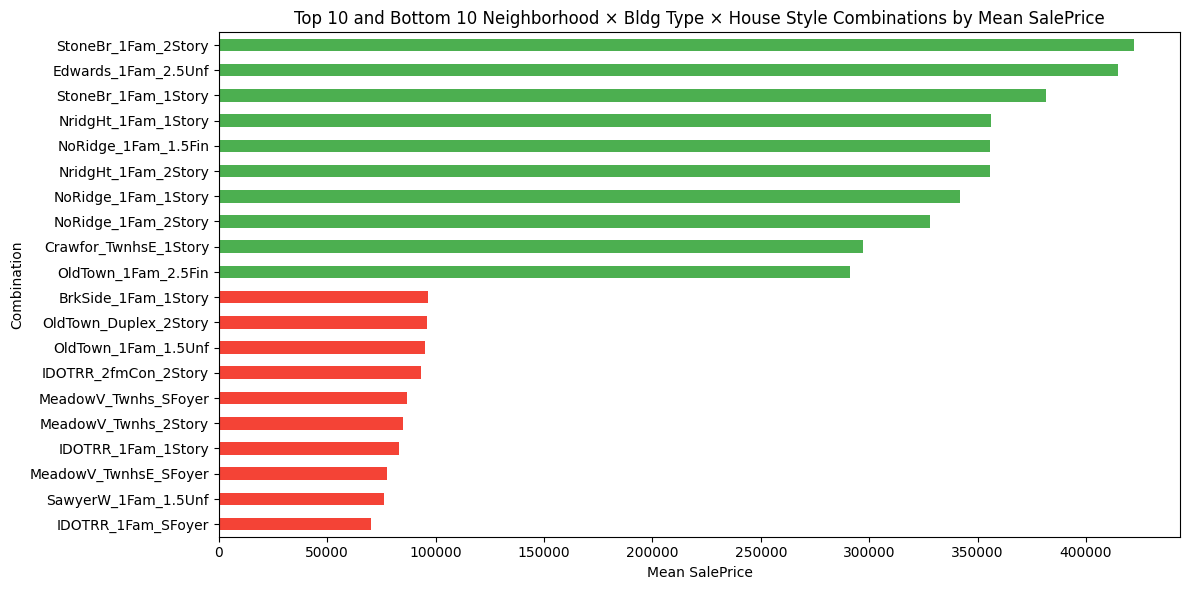

In [ ]:
top10 = combo_price.head(10)
bottom10 = combo_price.tail(10)

combo_plot = pd.concat([top10, bottom10])

plt.figure(figsize=(12, 6))
combo_plot.plot(kind='barh', color=['#4CAF50' if i < 10 else '#F44336' for i in range(len(combo_plot))])
plt.title('Top 10 and Bottom 10 Neighborhood × Bldg Type × House Style Combinations by Mean SalePrice')
plt.xlabel('Mean SalePrice')
plt.ylabel('Combination')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# move the new feature next to the related categorical ones
cols = list(df_copy.columns)
cols.insert(cols.index('House Style') + 1, cols.pop(cols.index('Combo_PriceMean')))
df_copy = df_copy[cols]


We created a new feature combining Neighborhood, Building Type, and House Style to capture interaction effects that influence sale price.

Certain combinations of location and house type consistently sell for higher or lower prices.

Instead of one-hot encoding hundreds of unique combinations, we summarize each combination by its median SalePrice, creating a single numeric feature.

This preserves the predictive signal while keeping the dataset compact.

Benefit: Houses in the same “combo group” are represented by their typical market value, improving correlation with SalePrice and reducing categorical complexity.

We still have to handle the 3 original features.

In [82]:
print(df_copy['Neighborhood'].value_counts())
print(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False))

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64
Neighborhood
StoneBr    319000.0
NridgHt    317750.0
NoRidge    302000.0
GrnHill    280000.0
Veenker    250250.0
Timber     231713.0
Somerst    225500.0
Crawfor    200624.0
CollgCr    200000.0
Greens     198000.0
ClearCr    197500.0
Blmngtn    191500.0
Gilbert    183000.0
NWAmes     181000.0
SawyerW    180000.0
Mitchel    153500.0
NPkVill    143750.0
NAmes      140000.0
Landmrk    137000.0
SWISU      136200.0
Sawyer     135000.0
Blueste    130500.0
BrkSide    126750.0
Edwards    125000.0
OldTown    119900.0
IDOTRR     106500.0
BrDale  

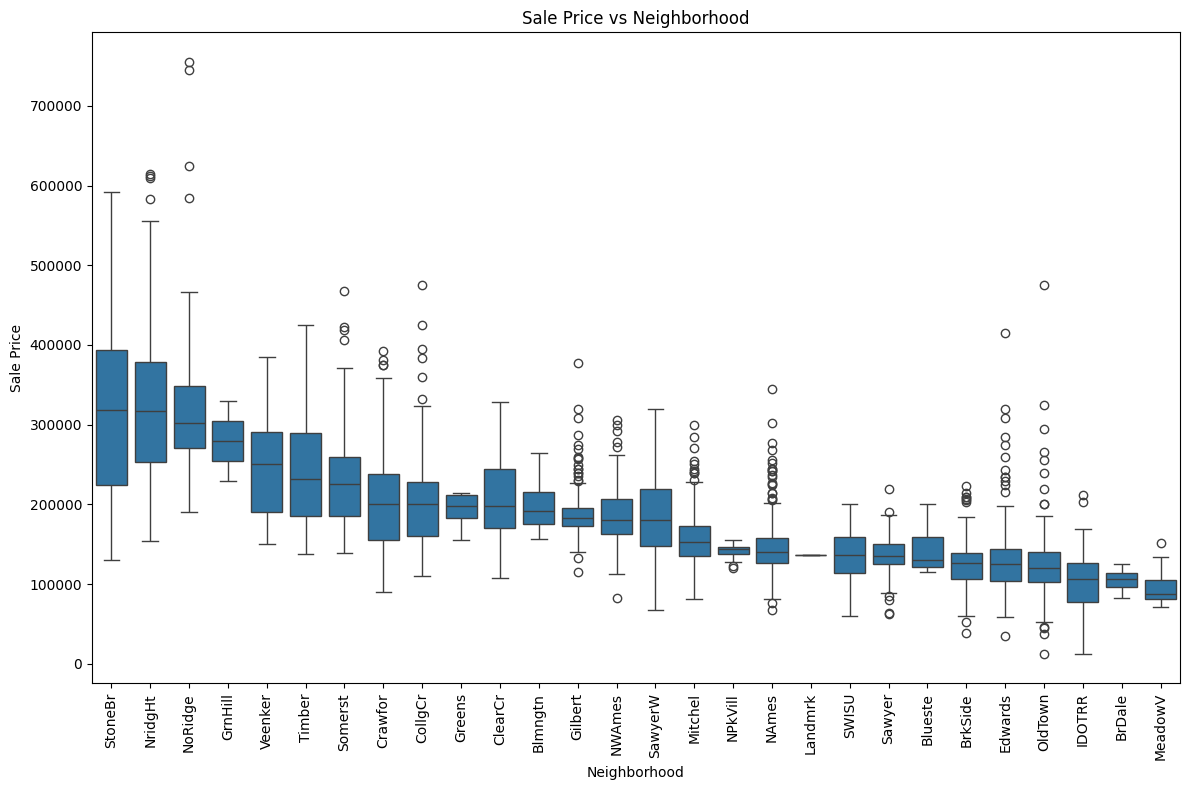

In [81]:
neigh_order = df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_copy, order=neigh_order)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [86]:
neigh_median_map = df_copy.groupby('Neighborhood')['SalePrice'].median()

df_copy['Neighborhood_MedianPrice'] = df_copy['Neighborhood'].map(neigh_median_map)

df_copy[['Neighborhood', 'Neighborhood_MedianPrice', 'SalePrice']].head(10)


C:\Users\stefa\AppData\Local\Temp\ipykernel_20756\982316973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Neighborhood_MedianPrice'] = df_copy['Neighborhood'].map(neigh_median_map)


,Neighborhood,Neighborhood_MedianPrice,SalePrice
0,NAmes,140000.0,215000
1,NAmes,140000.0,105000
2,NAmes,140000.0,172000
3,NAmes,140000.0,244000
4,Gilbert,183000.0,189900
5,Gilbert,183000.0,195500
6,StoneBr,319000.0,213500
7,StoneBr,319000.0,191500
8,StoneBr,319000.0,236500
9,Gilbert,183000.0,189000


In [87]:
df_copy.drop('Neighborhood', axis=1, inplace=True)

In [91]:
df_copy.drop('Neigh_Bldg_Style', axis=1, inplace=True)

In [89]:
cols = df_copy.columns.tolist()
cols.insert(cols.index('Lot Area') + 1, cols.pop(cols.index('Neighborhood_MedianPrice')))
df_copy = df_copy[cols]

We replaced the categorical Neighborhood feature with a numeric representation based on the median SalePrice per neighborhood.

Housing prices are often skewed, so the median is more robust to outliers than the mean.

This transformation allows the model to directly use location information in a numeric form, capturing the typical value of houses in each neighborhood.

After creating this new feature, the original Neighborhood column can be dropped to avoid redundancy.

In [93]:
print(df_copy['Bldg Type'].value_counts())
print(df_copy.groupby('Bldg Type')['SalePrice'].median().sort_values(ascending=False))

Bldg Type
1Fam      2422
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: count, dtype: int64
Bldg Type
TwnhsE    180000.0
1Fam      165000.0
Duplex    136905.0
Twnhs     130000.0
2fmCon    122250.0
Name: SalePrice, dtype: float64


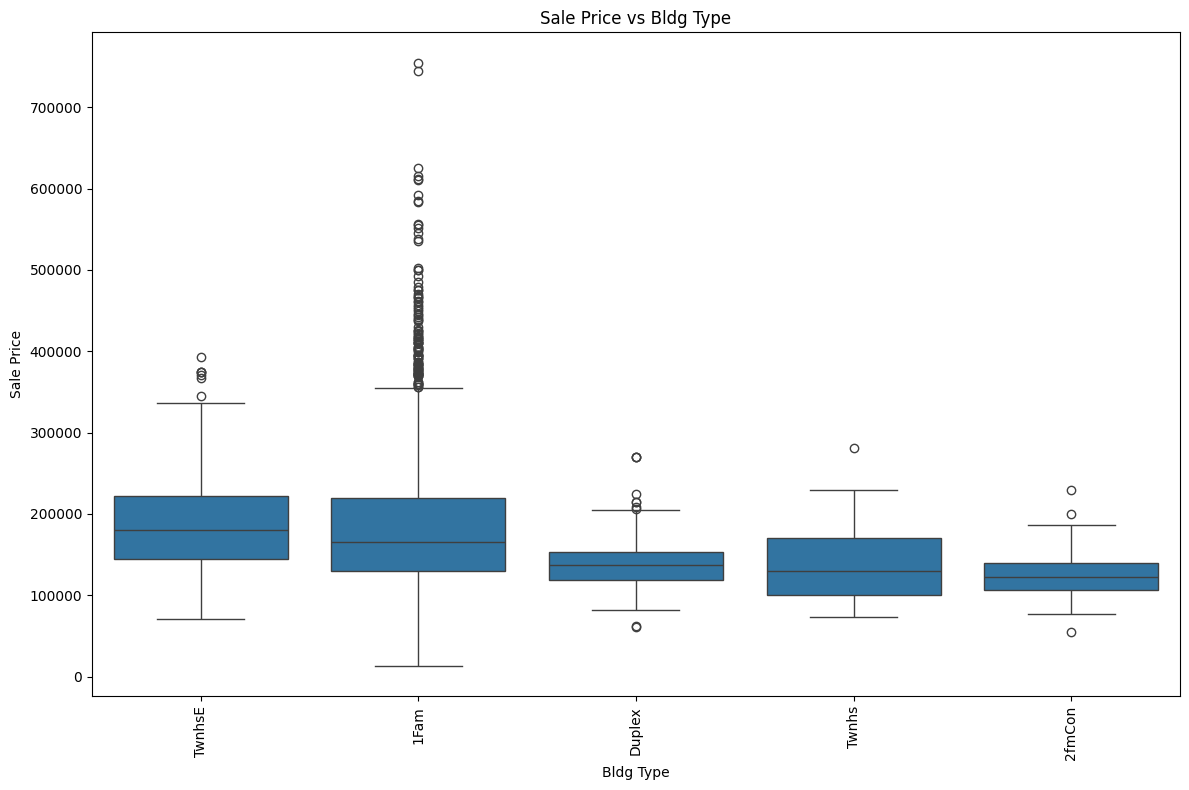

In [96]:
type_order = df_copy.groupby('Bldg Type')['SalePrice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Bldg Type', y='SalePrice', data=df_copy, order=type_order)
plt.xlabel('Bldg Type')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Bldg Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [97]:
bldg_type_price_map = df_copy.groupby('Bldg Type')['SalePrice'].median()

df_copy['BldgType_MedianPrice'] = df_copy['Bldg Type'].map(bldg_type_price_map)

df_copy.drop('Bldg Type', axis=1, inplace=True)


In [98]:
cols = df_copy.columns.tolist()
cols.insert(cols.index('Lot Area') + 1, cols.pop(cols.index('BldgType_MedianPrice')))
df_copy = df_copy[cols]

Converted Bldg Type to a numeric feature by replacing each category with its median SalePrice, capturing its typical price effect and allowing direct use in models.

In [100]:
print(df_copy['House Style'].value_counts())
print(df_copy.groupby('House Style')['SalePrice'].median().sort_values(ascending=False))

House Style
1Story    1478
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64
House Style
2.5Fin    194000.0
2Story    189000.0
SLvl      165000.0
2.5Unf    160950.0
1Story    155000.0
SFoyer    143000.0
1.5Fin    129675.0
1.5Unf    113000.0
Name: SalePrice, dtype: float64


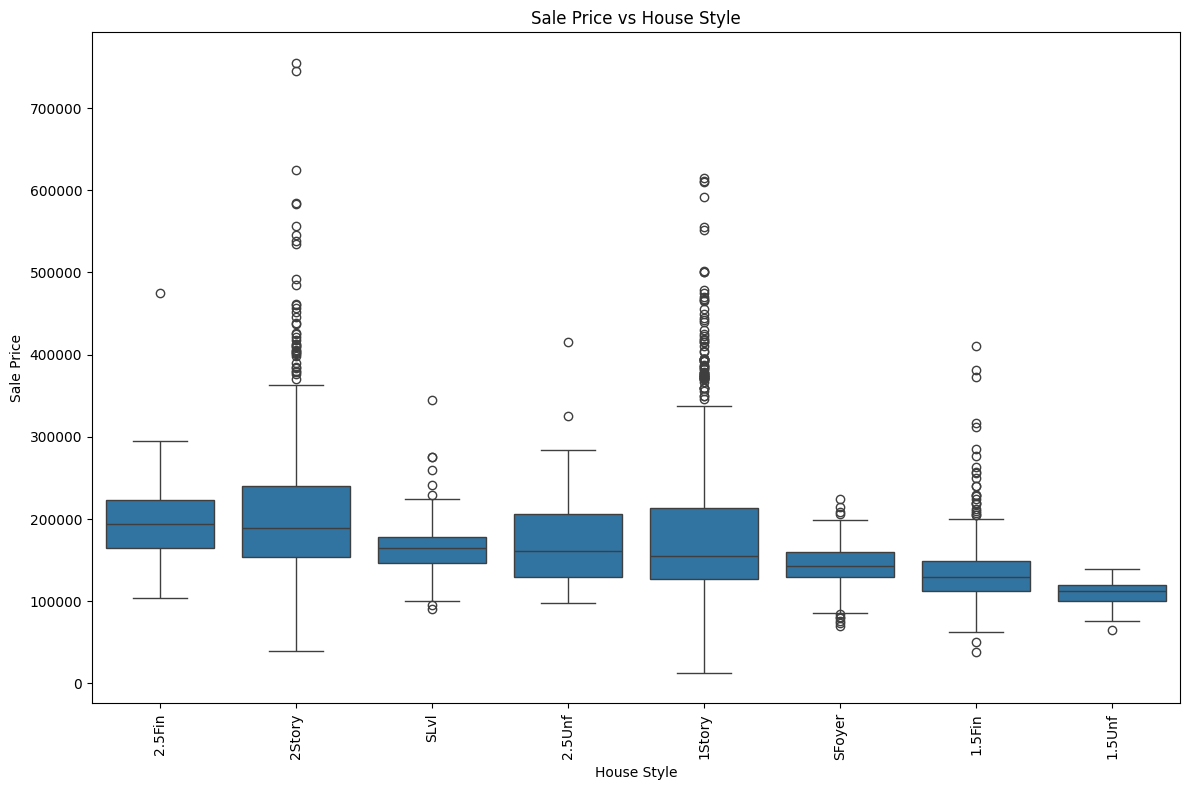

In [101]:
type_order = df_copy.groupby('House Style')['SalePrice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='House Style', y='SalePrice', data=df_copy, order=type_order)
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.title('Sale Price vs House Style')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [102]:
house_style_price = df_copy.groupby('House Style')['SalePrice'].median()
df_copy['HouseStyle_MedianPrice'] = df_copy['House Style'].map(house_style_price)

df_copy.drop('House Style', axis=1, inplace=True)

cols = df_copy.columns.tolist()
cols.insert(cols.index('Lot Area') + 1, cols.pop(cols.index('HouseStyle_MedianPrice')))
df_copy = df_copy[cols]

Converted House Style to a numeric feature by replacing each category with its median SalePrice, reflecting the typical price impact of different dwelling styles.

In [104]:
df_copy.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Condition 1     2927 non-null   object
 1   Condition 2     2927 non-null   object
 2   Roof Style      2927 non-null   object
 3   Roof Matl       2927 non-null   object
 4   Exterior 1st    2927 non-null   object
 5   Exterior 2nd    2927 non-null   object
 6   Exter Qual      2927 non-null   object
 7   Exter Cond      2927 non-null   object
 8   Foundation      2927 non-null   object
 9   Heating         2927 non-null   object
 10  Heating QC      2927 non-null   object
 11  Central Air     2927 non-null   object
 12  Kitchen Qual    2927 non-null   object
 13  Functional      2927 non-null   object
 14  Paved Drive     2927 non-null   object
 15  Sale Type       2927 non-null   object
 16  Sale Condition  2927 non-null   object
dtypes: object(17)
memory usage: 388.9+ KB
